# Assignment05

## Name: YangMyungCheol (양명철)
## ID: 20122776
## Submission Time: 2019.05.09. 18:10

[K-means clustering on the spatial domain]

Apply K-means algorithm to the regular grid of a spatial domain in two dimension with varying number of clusters.

The spatial domain can be represented by two matrices where one matrix represents the horizontal index and the other matrix represents the vertical index.

Define a distance between each spatial point $(x_i, y_i)$ and a centroid $(c_x^k, c_y^k)$ for cluster k using L2-norm square and L1-norm.

Visualize the result using color coding scheme that distinguishes different clusters.

Observe the trajectory of centroid during the optimization and the shape of the clusters depending on the distance.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal
from skimage import io, color
from skimage import exposure
import sys
import math
import random
import PIL.Image as pilimg
import copy
 
# set row, column for 2 dimenstion
row = 400
column = 400

# L1-Norm

In [2]:
# Designate the location
location_x = []
for r in range(row):
    list_column = []
    for c in range(column):
        list_column.append(r)
    location_x.append(list_column)
    
location_y = []
for r in range(row):
    list_column = []
    for c in range(column):
        list_column.append(c)
    location_y.append(list_column)

In [5]:
# Make label of grid
# First stage: Random labeling

#set the number of cluster
k = 8         

grid_label = []
for r in range(row):
    list_column = [random.randint(0, k-1) for i in range(column)]
    grid_label.append(list_column)

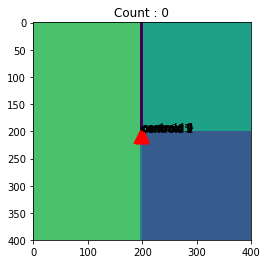

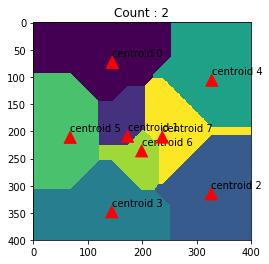

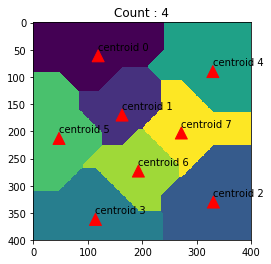

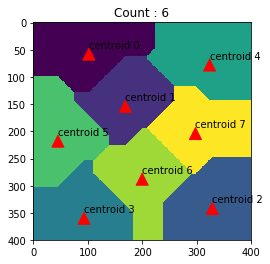

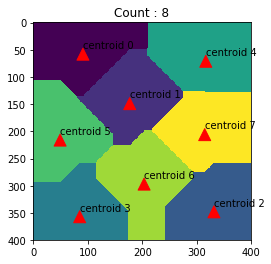

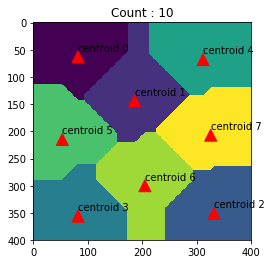

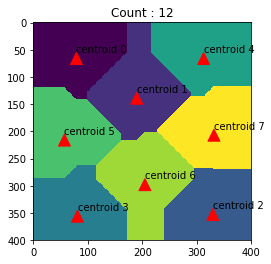

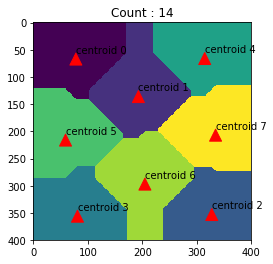

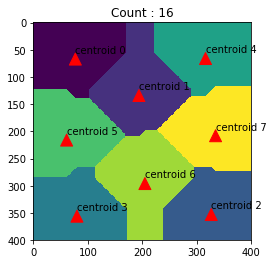

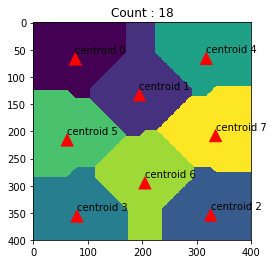

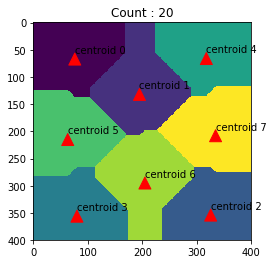

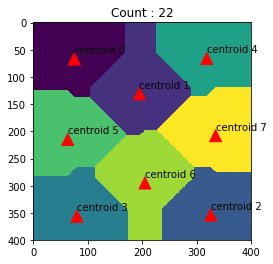

break


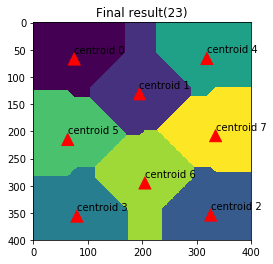

In [6]:
# Calculate Centroid

count = 0
while True:
    centroid_x = []
    centroid_y = []
    count_group = []

    # count value & centroid value initializing zero
    for i in range(k):                    
        count_group.append(0)            
        centroid_x.append([])           
        centroid_y.append([])

    # Calculate the average
    # Add grid
    for r in range(row):
        for c in range(column):
            centroid_x[grid_label[r][c]].append(location_x[r][c])
            centroid_y[grid_label[r][c]].append(location_y[r][c])
            count_group[grid_label[r][c]] += 1

    # divide and count each
    x = copy.deepcopy(centroid_x)   # save the image for comparing before and after
    y = copy.deepcopy(centroid_y)

    for num in range(k):
        centroid_x[num] = np.median(x[num])
        centroid_y[num] = np.median(y[num])
    #print(centroid_x)
    #print(centroid_y)
        
    # re-labeling
    prev_grid_label = copy.deepcopy(grid_label)  # save the image for comparing before and after

    for r in range(row):
        for c in range(column):
            temp = 999999
            for i in range(k):
                distance = np.abs((centroid_x[i] - location_x[r][c])) + np.abs((centroid_y[i] - location_y[r][c]))
                if temp > distance:
                    grid_label[r][c] = i
                    temp = distance
                        
    # show the image
    if count % 2 == 0:
        plt.imshow(grid_label)
        for i in range(k):
            plt.annotate("centroid %d"%(i), (centroid_y[i], centroid_x[i]), arrowprops={'color':'red'})
        plt.title('Count : ' + str(count))
        plt.show()
                    
    # Check the label is changed (if it is not cheanged, stop the processing)
    if prev_grid_label == grid_label:
        print("break")
        break
        
    count += 1
    
    
    
# final image
plt.imshow(grid_label)
for i in range(k):
    plt.annotate("centroid %d"%(i), (centroid_y[i], centroid_x[i]), arrowprops={'color':'red'})
plt.title('Final result' +  "(" + str(count) + ")")
plt.show()


# L2-Norm

In [7]:
k = 8        

grid_label = []
for r in range(row):
    list_column = [random.randint(0, k-1) for i in range(column)]
    grid_label.append(list_column)

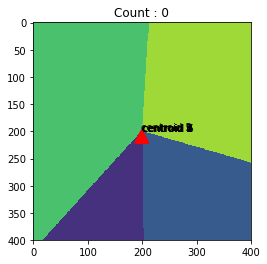

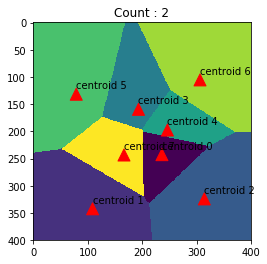

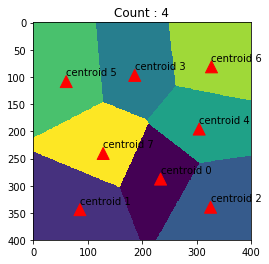

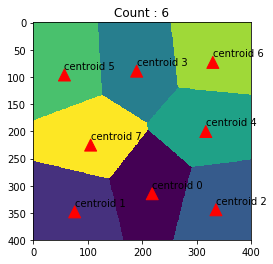

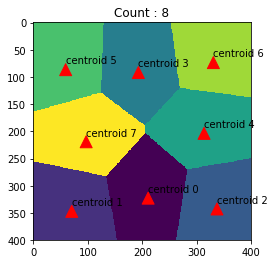

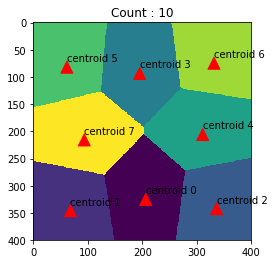

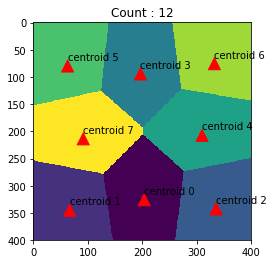

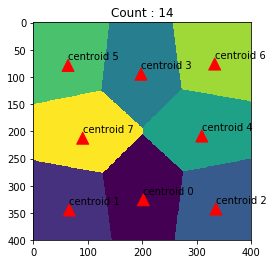

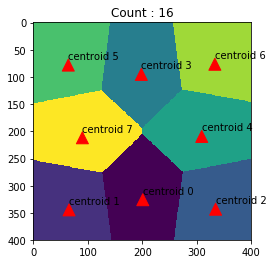

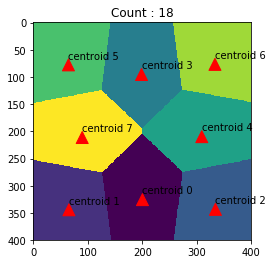

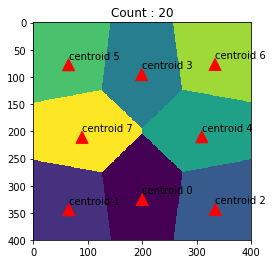

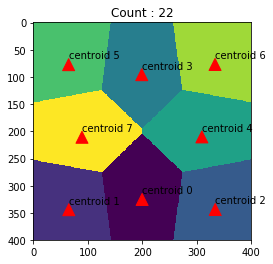

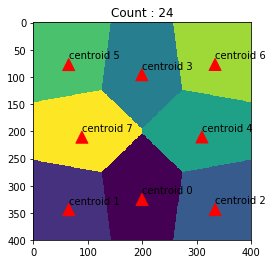

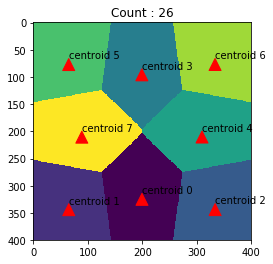

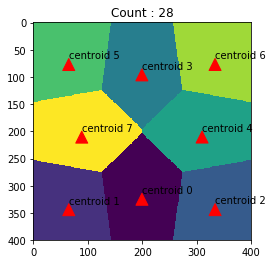

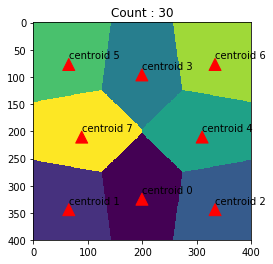

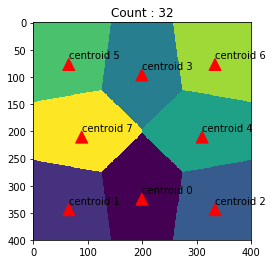

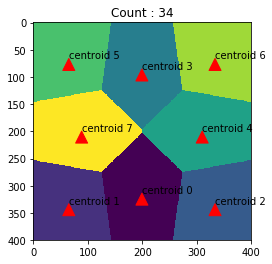

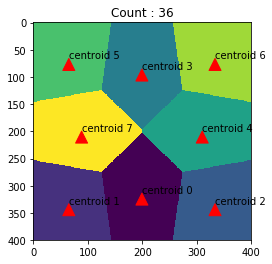

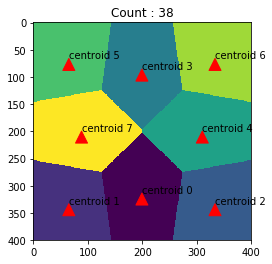

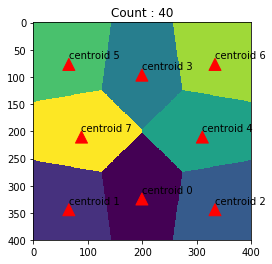

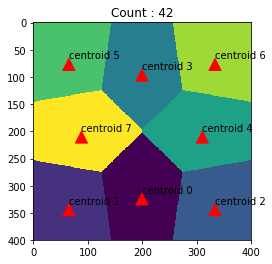

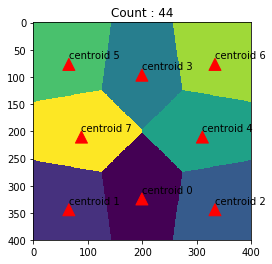

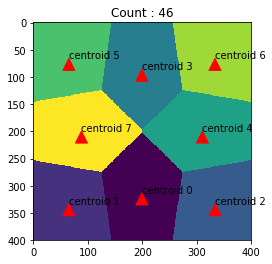

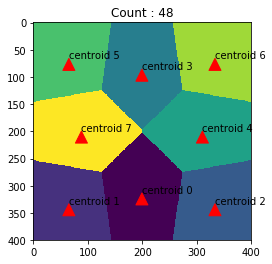

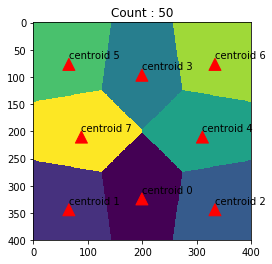

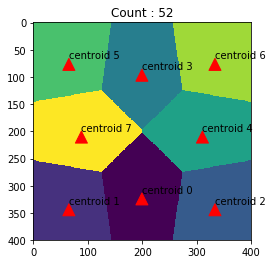

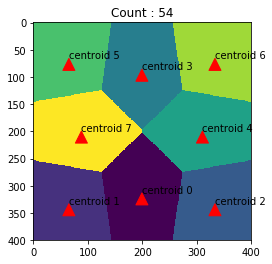

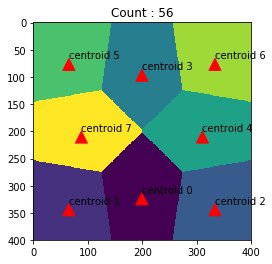

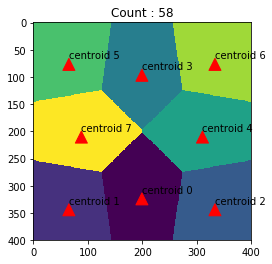

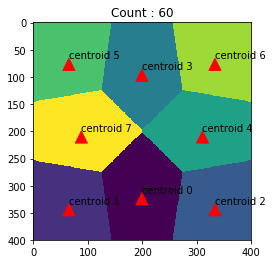

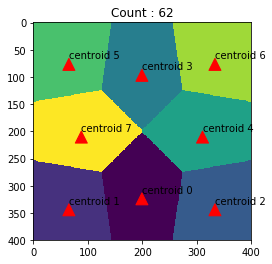

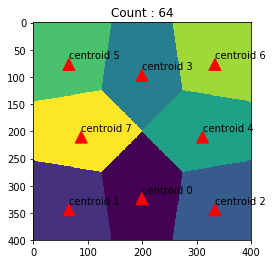

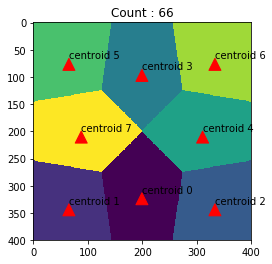

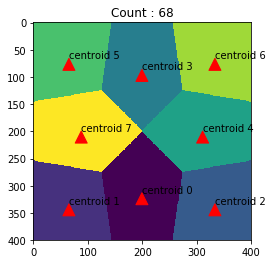

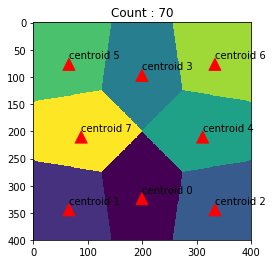

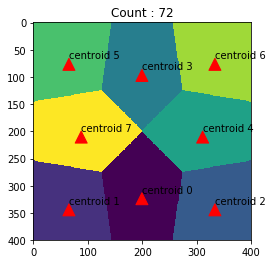

break


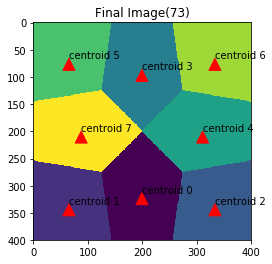

In [8]:

count = 0
while True:
    centroid_x = []
    centroid_y = []
    count_group = []

    for i in range(k):                    
        count_group.append(0)           
        centroid_x.append(0)                 
        centroid_y.append(0)


    for r in range(row):
        for c in range(column):
            centroid_x[grid_label[r][c]] += location_x[r][c]
            centroid_y[grid_label[r][c]] += location_y[r][c]
            count_group[grid_label[r][c]] += 1


    for num in range(k):
        if count_group[num] != 0:
            centroid_x[num] /= count_group[num]
            centroid_y[num] /= count_group[num]

    prev_grid_label = copy.deepcopy(grid_label) 

    for r in range(row):
        for c in range(column):
            temp = 999999
            for i in range(k):
                if count_group[i] != 0:
                    distance = (centroid_x[i] - location_x[r][c]) ** 2 + (centroid_y[i] - location_y[r][c]) ** 2
                    if temp > distance:
                        grid_label[r][c] = i
                        temp = distance
                        
    if count % 2 == 0:
        plt.imshow(grid_label)
        for i in range(k):
            plt.annotate("centroid %d"%(i), (centroid_y[i], centroid_x[i]), arrowprops={'color':'red'})
        plt.title('Count : ' + str(count))
        plt.show()
                    
    if prev_grid_label == grid_label:
        print("break")
        break
        
    count += 1
    
    
plt.imshow(grid_label)
for i in range(k):
    plt.annotate("centroid %d"%(i), (centroid_y[i], centroid_x[i]), arrowprops={'color':'red'})
plt.title('Final Image' +  "(" + str(count) + ")")
plt.show()
